In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path

In [2]:
# A function which can sort dataframes in a list of a dataframes. Based on bubble sort.
def sort_dataframe(dataframes: list, key: str):
    swapped = True
    while (swapped):
        swapped = False
        for i in range(len(dataframes)-1):
            # dataframes[i] gives us the ith dataframe, dataframes[i][key] gives us the right column and 
            # dataframes[i][key][0] gives us the first element of that column. We can do this because 
            # key should be equal for the whole column.
            a = dataframes[i][key][0]
            b = dataframes[i+1][key][0]
            if a > b:
                temp = dataframes[i]
                dataframes[i] = dataframes[i+1]
                dataframes[i+1] = temp
                swapped = True

We generate the graph for figure 1. Here we compare std::shuffle with fy, fy_32 and fy_64

In [97]:
# We load data
base_case_files = glob.glob(path.join("..", "cpp", "uni-machine", "v1.0.0", "base_case", "*.csv"))
dfs_base_case = [pd.read_csv(f) for f in base_case_files]

In [98]:
# We calculate runtime per integer
for df in dfs_base_case:
    df["runtime/integer [ns]"] = df["total_runtime"] / (df["total_runs"] * df["integers"])

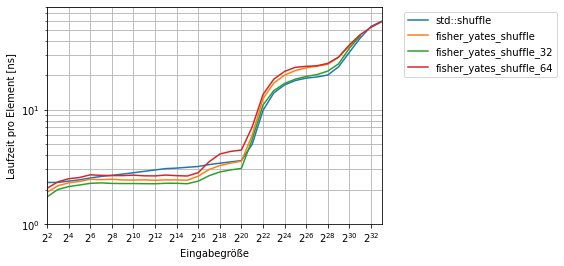

In [99]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 35, 2)]
ax_yticks = [5 * i for i in range(0, 20, 1)]

fig, ax = plt.subplots()
# ax = dfs_base_case[0].plot(x="integers", y="runtime/integer [ns]", label=dfs_base_case[0]["function"][0])
for i in range(0, len(dfs_base_case)-2):
    dfs_base_case[i].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_base_case[i]["function"][0] )

ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
# ax.set_yticks(ax_yticks)
ax.set_xlim(2**2, 2**33)
ax.set_ylim(1, 80)
ax.grid(True, which="both")
ax.set_xlabel("Eingabegröße")
ax.set_ylabel("Laufzeit pro Element [ns]")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax.set_title("Comapring cip_shuffle threshold")

plt.savefig(path.join("..", "..", "graphs", "std_vs_fy.svg"))

In [100]:
# base algorithm is std::shuffle
df_base = dfs_base_case[0]

for df in dfs_base_case:
    # speedup = df / df_base
    df["speedup"] = df_base["runtime/integer [ns]"] / df["runtime/integer [ns]"]

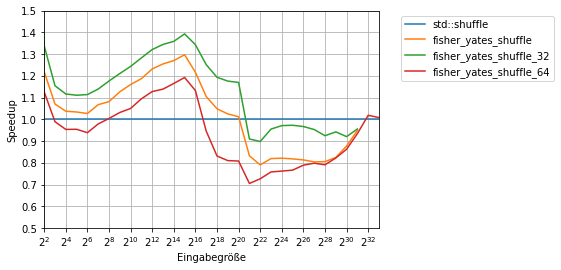

In [109]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 35, 2)]
ax_yticks = [0.1 * i for i in range(0, 20, 1)]

fig, ax = plt.subplots()
# ax = dfs_base_case[0].plot(x="integers", y="runtime/integer [ns]", label=dfs_base_case[0]["function"][0])
for i in range(0, len(dfs_base_case)-2):
    dfs_base_case[i].plot(ax=ax, x="integers", y="speedup", label=dfs_base_case[i]["function"][0] )

ax.set_xscale("log", base=2)
# ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
ax.set_yticks(ax_yticks)
ax.set_xlim(2**2, 2**33)
ax.set_ylim(0.5, 1.5)
ax.grid(True, which="both")
ax.set_xlabel("Eingabegröße")
ax.set_ylabel("Speedup")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax.set_title("Comapring cip_shuffle threshold")

plt.savefig(path.join("..", "..", "graphs", "std_vs_fy_speedup.svg"))

Now we create graphs for figure 2. We check if we should dynmically adjust the BUFFER_THRESHOLD or not. We focus on the lower bound of the numbers

In [26]:
# Data for constant threshold
buffered_constant_files = glob.glob(path.join("..", "cpp", "uni-machine", "v1.0.0", "buffered", "*.csv"))
dfs_buffered_constant = [pd.read_csv(f) for f in buffered_constant_files]

# Data from dynamic
buffered_dynamic_files = glob.glob(path.join("..", "cpp", "uni-machine", "v0.1.11", "buffered", "*.csv"))
dfs_buffered_dynamic = [pd.read_csv(f) for f in buffered_dynamic_files]

In [27]:
# We sort the data
sort_dataframe(dfs_buffered_constant, "buffer")
sort_dataframe(dfs_buffered_dynamic, "buffer")

In [28]:
# We calculate runtime per integer
for df in dfs_buffered_constant:
    df["runtime/integer [ns]"] = df["total_runtime"] / (df["total_runs"] * df["integers"])

# We calculate runtime per integer
for df in dfs_buffered_dynamic:
    df["runtime/integer [ns]"] = df["total_runtime"] / (df["total_runs"] * df["integers"])

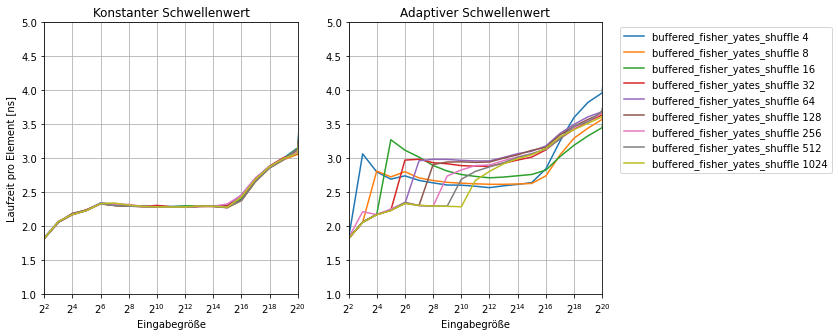

In [60]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 31, 2)]
ax_yticks = [0.5 * i for i in range(0, 100, 1)]

# half = int(len(dfs_buffered)/2)

fig, axes = plt.subplots(1, 2, figsize=(10,5)) # figsize=(5,10)

for i in range(2, len(buffered_constant_files)):
    dfs_buffered_constant[i].plot(ax=axes[0], x="integers", y="runtime/integer [ns]", label=dfs_buffered_constant[i]["function"][0] + " " + str(dfs_buffered_constant[i]["buffer"][0]))
    dfs_buffered_dynamic[i].plot(ax=axes[1], x="integers", y="runtime/integer [ns]", label=dfs_buffered_dynamic[i]["function"][0] + " " + str(dfs_buffered_dynamic[i]["buffer"][0]))

for i in range(2):
    ax = axes[i]
    ax.set_xscale("log", base=2)
    # ax.set_yscale("log", base=10)
    ax.set_xticks(ax_xticks)
    # ax.set_yticks(ax_yticks)
    ax.set_xlim(2**2, 2**20)
    ax.set_ylim(1, 5)
    ax.grid(True, which="both")
    ax.set_xlabel("Eingabegröße")

axes[0].set_ylabel("Laufzeit pro Element [ns]")
axes[0].legend().set_visible(False)
axes[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
axes[0].set_title("Konstanter Schwellenwert")
axes[1].set_title("Adaptiver Schwellenwert")
# fig.suptitle("Comapring different buffer sizes")

plt.savefig(path.join("..", "..", "graphs", "buffer_constant_dynamic.svg"))

Now figure 3. We compare different buffer sizes. Focus on 2^20 and bigger.

In [37]:
# Data for constant threshold
buffered_files = glob.glob(path.join("..", "cpp", "uni-machine", "v1.0.0", "buffered", "*.csv"))
dfs_buffered = [pd.read_csv(f) for f in buffered_constant_files]

In [40]:
# We sort the data
sort_dataframe(dfs_buffered, "buffer")

In [41]:
# We calculate runtime per integer
for df in dfs_buffered:
    df["runtime/integer [ns]"] = df["total_runtime"] / (df["total_runs"] * df["integers"])

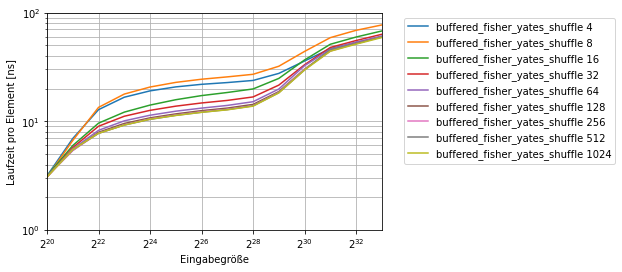

In [62]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 35, 2)]
ax_yticks = [5 * i for i in range(0, 20, 1)]

fig, ax = plt.subplots()
# ax = dfs_base_case[0].plot(x="integers", y="runtime/integer [ns]", label=dfs_base_case[0]["function"][0])
for i in range(2, len(dfs_buffered)):
    dfs_buffered[i].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_buffered[i]["function"][0] + " " + str(dfs_buffered[i]["buffer"][0]))

ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
# ax.set_yticks(ax_yticks)
ax.set_xlim(2**20, 2**33)
ax.set_ylim(1, 100)
ax.grid(True, which="both")
ax.set_xlabel("Eingabegröße")
ax.set_ylabel("Laufzeit pro Element [ns]")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax.set_title("Comapring cip_shuffle threshold")

plt.savefig(path.join("..", "..", "graphs", "buffer_sizes.svg"))

Now figure 4. We compare the functions for the base case.

In [63]:
# We load data
base_case_files = glob.glob(path.join("..", "cpp", "uni-machine", "v1.0.0", "base_case", "*.csv"))
dfs_base_case = [pd.read_csv(f) for f in base_case_files]

In [64]:
# We calculate runtime per integer
for df in dfs_base_case:
    df["runtime/integer [ns]"] = df["total_runtime"] / (df["total_runs"] * df["integers"])

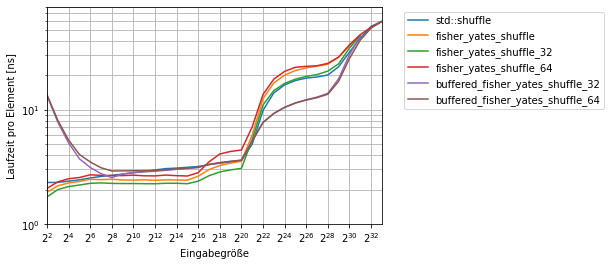

In [67]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 35, 2)]
ax_yticks = [5 * i for i in range(0, 20, 1)]

fig, ax = plt.subplots()
for i in range(0, len(dfs_base_case)):
    dfs_base_case[i].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_base_case[i]["function"][0] )

ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
# ax.set_yticks(ax_yticks)
ax.set_xlim(2**2, 2**33)
ax.set_ylim(1, 80)
ax.grid(True, which="both")
ax.set_xlabel("Eingabegröße")
ax.set_ylabel("Laufzeit pro Element [ns]")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax.set_title("Comapring cip_shuffle threshold")

plt.savefig(path.join("..", "..", "graphs", "base_case.svg"))

Figure 5 will be about buckets.

In [68]:
# We load data
buckets_files = glob.glob(path.join("..", "cpp", "uni-machine", "v1.0.0", "buckets", "*.csv"))
dfs_buckets = [pd.read_csv(f) for f in buckets_files]

In [69]:
# We calculate runtime per integer
for df in dfs_buckets:
    df["runtime/integer [ns]"] = df["total_runtime"] / (df["total_runs"] * df["integers"])

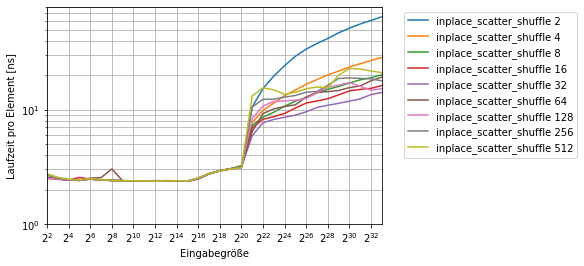

In [85]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 35, 2)]
ax_yticks = [5 * i for i in range(0, 20, 1)]

fig, ax = plt.subplots()
for i in range(0, len(dfs_buckets)-1):
    dfs_buckets[i].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_buckets[i]["function"][0] + " " + str(dfs_buckets[i]["buckets"][0]))

ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
# ax.set_yticks(ax_yticks)
ax.set_xlim(2**2, 2**33)
ax.set_ylim(1, 80)
ax.grid(True, which="both")
ax.set_xlabel("Eingabegröße")
ax.set_ylabel("Laufzeit pro Element [ns]")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax.set_title("Comapring cip_shuffle threshold")

plt.savefig(path.join("..", "..", "graphs", "bucket_sizes.svg"))

In [116]:
df_base_ip = dfs_buckets[4]

# We calculate runtime per integer
for df in dfs_buckets:
    df["speedup"] = df_base_ip["runtime/integer [ns]"] / df["runtime/integer [ns]"]

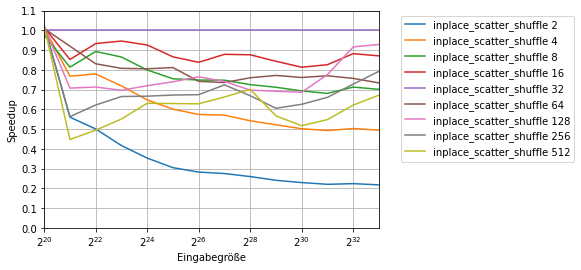

In [125]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 35, 2)]
ax_yticks = [0.1 * i for i in range(0, 20, 1)]

fig, ax = plt.subplots()
for i in range(0, len(dfs_buckets)-1):
    dfs_buckets[i].plot(ax=ax, x="integers", y="speedup", label=dfs_buckets[i]["function"][0] + " " + str(dfs_buckets[i]["buckets"][0]))

ax.set_xscale("log", base=2)
# ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
ax.set_yticks(ax_yticks)
ax.set_xlim(2**20, 2**33)
ax.set_ylim(0, 1.1)
ax.grid(True, which="both")
ax.set_xlabel("Eingabegröße")
ax.set_ylabel("Speedup")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax.set_title("Comapring cip_shuffle threshold")

plt.savefig(path.join("..", "..", "graphs", "bucket_sizes_speedup.svg"))

Figure 6 for the threshold.

In [76]:
# We load data
threshold_files = glob.glob(path.join("..", "cpp", "uni-machine", "v1.0.0", "threshold", "*.csv"))
dfs_threshold = [pd.read_csv(f) for f in threshold_files]

In [78]:
# We calculate runtime per integer
for df in dfs_threshold:
    df["runtime/integer [ns]"] = df["total_runtime"] / (df["total_runs"] * df["integers"])

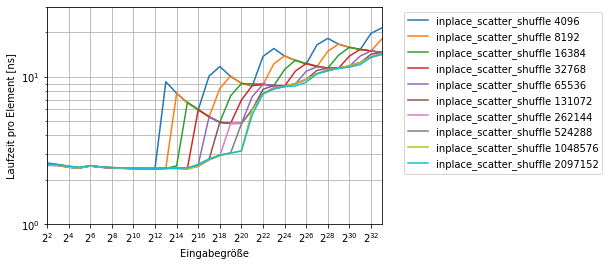

In [86]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 35, 2)]
ax_yticks = [5 * i for i in range(0, 20, 1)]

fig, ax = plt.subplots()
for i in range(2, len(dfs_threshold)-1):
    dfs_threshold[i].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_threshold[i]["function"][0] + " " + str(dfs_threshold[i]["threshold"][0]))

ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
# ax.set_yticks(ax_yticks)
ax.set_xlim(2**2, 2**33)
ax.set_ylim(1, 30)
ax.grid(True, which="both")
ax.set_xlabel("Eingabegröße")
ax.set_ylabel("Laufzeit pro Element [ns]")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax.set_title("Comapring cip_shuffle threshold")

plt.savefig(path.join("..", "..", "graphs", "threshold_sizes.svg"))

Fgiure 7, finale comparison

In [87]:
# We load data
df_std = pd.read_csv(path.join("..", "cpp", "uni-machine", "v1.0.0", "base_case", "20231217-192420-nb=32-bf=256-th=262144-cpp.csv"))
df_fy= pd.read_csv(path.join("..", "cpp", "uni-machine", "v1.0.0", "base_case", "20231217-215810-nb=32-bf=256-th=262144-cpp.csv"))
df_fy_32 = pd.read_csv(path.join("..", "cpp", "uni-machine", "v1.0.0", "base_case", "20231217-224305-nb=32-bf=256-th=262144-cpp.csv"))
df_fy_64 = pd.read_csv(path.join("..", "cpp", "uni-machine", "v1.0.0", "base_case", "20231217-225627-nb=32-bf=256-th=262144-cpp.csv"))
df_bfy_32= pd.read_csv(path.join("..", "cpp", "uni-machine", "v1.0.0", "base_case", "20231218-001156-nb=32-bf=256-th=262144-cpp.csv"))
df_bfy_64 = pd.read_csv(path.join("..", "cpp", "uni-machine", "v1.0.0", "base_case", "20231218-002410-nb=32-bf=256-th=262144-cpp.csv"))
df_bfy = pd.read_csv(path.join("..", "cpp", "uni-machine", "v1.0.0", "buffered", "20231221-070924-nb=0-bf=256-th=0-cpp.csv"))

df_ipsc = pd.read_csv(path.join("..", "cpp", "uni-machine", "v1.0.0", "buckets", "20231222-055446-nb=32-bf=256-th=1048576-cpp.csv"))

df_rust_default = pd.read_csv(path.join("..", "rust", "20231227-173557-nb=128-th=262144-r.csv"))
df_rust_equal = pd.read_csv(path.join("..", "rust", "20231227-175653-nb=32-th=1048576-r.csv"))

In [88]:
dfs = [df_std, df_fy, df_fy_32, df_fy_64, df_bfy_32, df_bfy_64, df_bfy, df_ipsc, df_rust_default, df_rust_equal]

In [89]:
# We calculate runtime per integer
for df in dfs:
    df["runtime/integer [ns]"] = df["total_runtime"] / (df["total_runs"] * df["integers"])

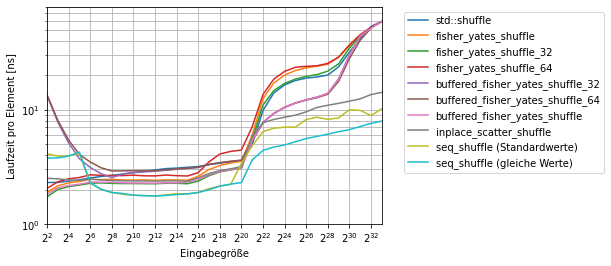

In [96]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 34, 2)]
ax_yticks = [1 * i for i in range(0, 50, 1)]

fig, ax = plt.subplots()

for i in range(0, len(dfs)- 2):
    dfs[i].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs[i]["function"][0])

df_rust_default.plot(ax=ax, x="integers", y="runtime/integer [ns]", label=df_rust_default["function"][0] + " (Standardwerte)")
df_rust_equal.plot(ax=ax, x="integers", y="runtime/integer [ns]", label=df_rust_equal["function"][0] + " (gleiche Werte)")

ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
# ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50])
ax.set_xlim(2**2, 2**33)
ax.set_ylim(1, 80)
ax.grid(True, which="both")
ax.set_xlabel("Eingabegröße")
ax.set_ylabel("Laufzeit pro Element [ns]")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax.set_title("Comapring shuffle algorithms")

plt.savefig(path.join("..", "..", "graphs", "comparision.svg"))

In [132]:
# base algorithm is std::shuffle
df_base_all = dfs[7]

for df in dfs:
    # speedup = df_base / df 
    df["speedup"] = df_base_all["runtime/integer [ns]"] / df["runtime/integer [ns]"]

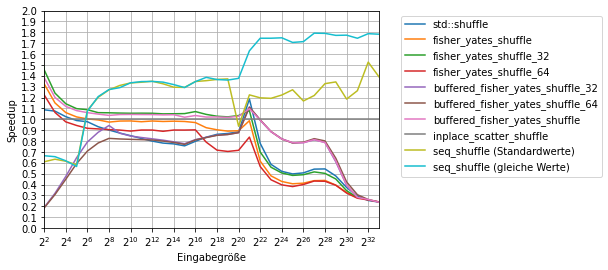

In [138]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 34, 2)]
ax_yticks = [0.1 * i for i in range(0, 50, 1)]

fig, ax = plt.subplots()

for i in range(0, len(dfs)- 2):
    dfs[i].plot(ax=ax, x="integers", y="speedup", label=dfs[i]["function"][0])

df_rust_default.plot(ax=ax, x="integers", y="speedup", label=df_rust_default["function"][0] + " (Standardwerte)")
df_rust_equal.plot(ax=ax, x="integers", y="speedup", label=df_rust_equal["function"][0] + " (gleiche Werte)")

ax.set_xscale("log", base=2)
# ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
ax.set_yticks(ax_yticks)
# ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50])
ax.set_xlim(2**2, 2**33)
ax.set_ylim(0, 2)
ax.grid(True, which="both")
ax.set_xlabel("Eingabegröße")
ax.set_ylabel("Speedup")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax.set_title("Comapring shuffle algorithms")

plt.savefig(path.join("..", "..", "graphs", "comparision_speedup.svg"))